# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [1]:
#pip install googlesearch-python

In [2]:
#pip install colorama

In [3]:
#pip install easygui

In [4]:
#pip install xgboost

In [5]:
#pip install catboost

In [6]:
#importing required libraries
import gradio as gr
import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [7]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [8]:
#Shape of dataframe

data.shape

(11054, 32)

In [9]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [10]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [11]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [12]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [13]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


data_set.append(9 OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

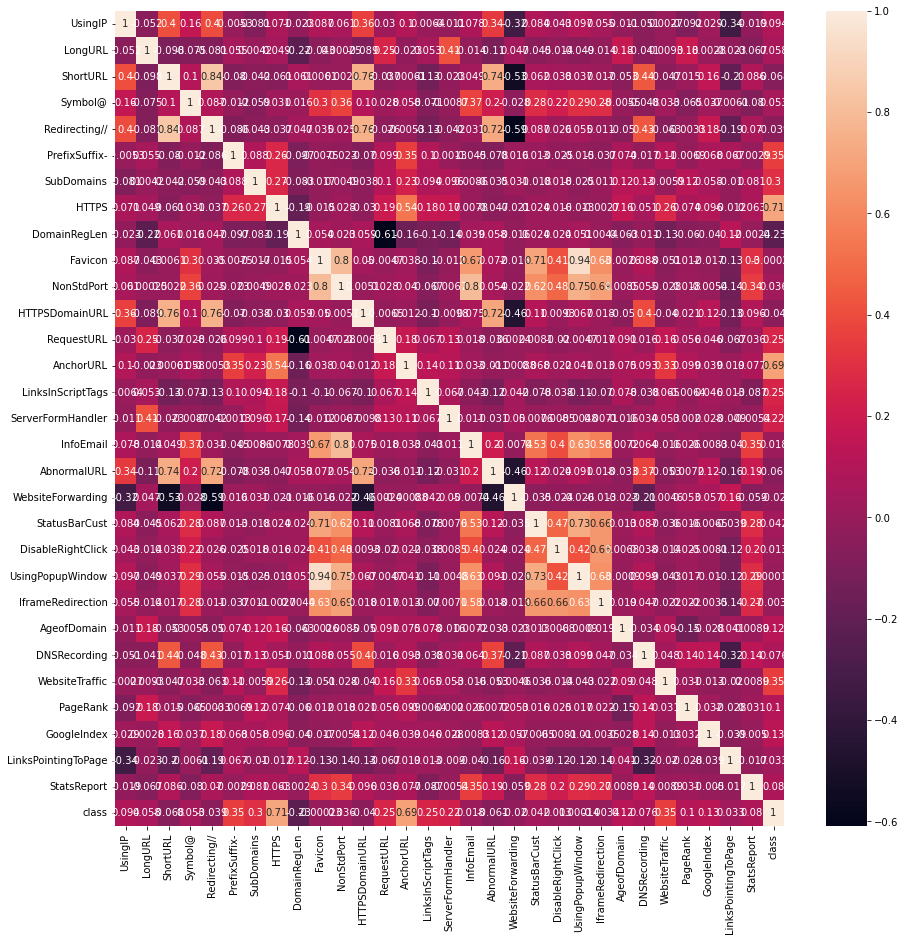

In [14]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

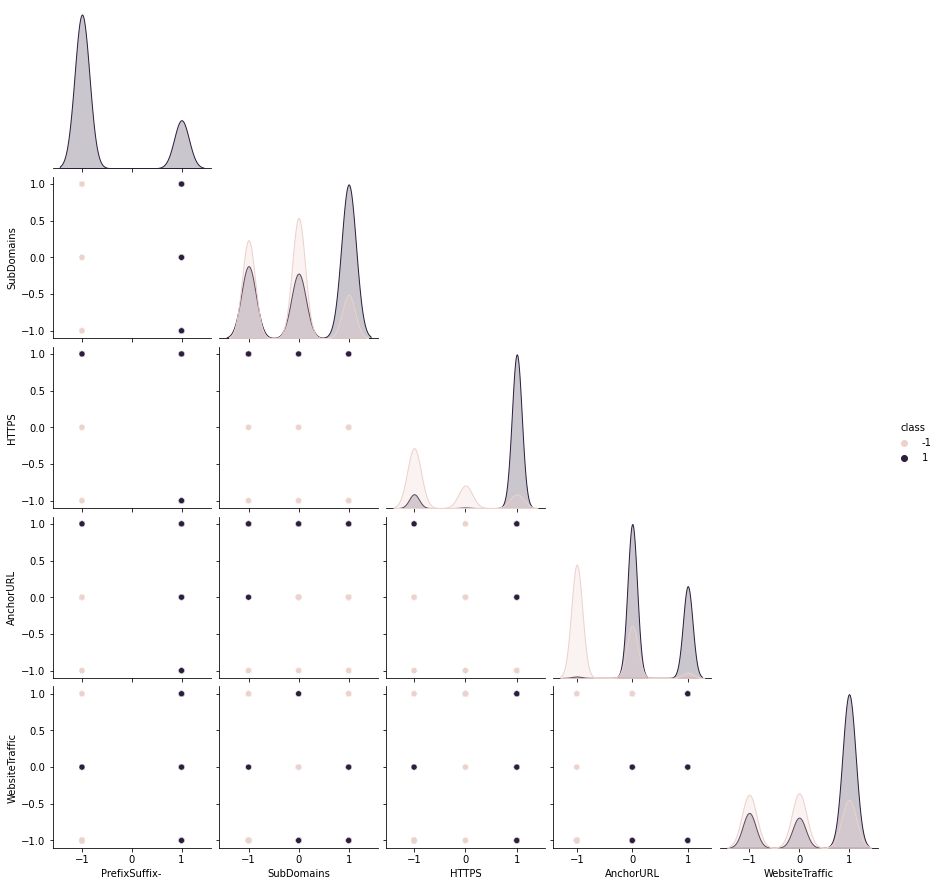

In [15]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


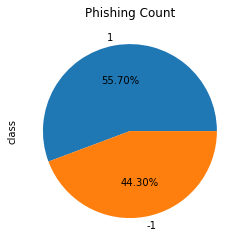

In [16]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [17]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [18]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [19]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [20]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [21]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [22]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [23]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [24]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [25]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [27]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [28]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



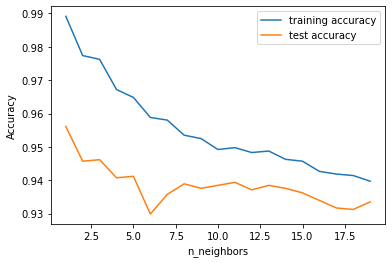

In [29]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [30]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [31]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [32]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [33]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [34]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [35]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [36]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [37]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [38]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [39]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [40]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [41]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [42]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [43]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.961

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.965

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.962

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.967


In [44]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.96       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



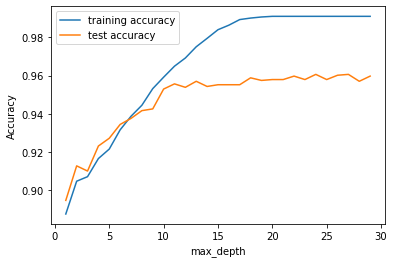

In [45]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [46]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [47]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [48]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [49]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.968

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.972

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.974

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.967


In [50]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



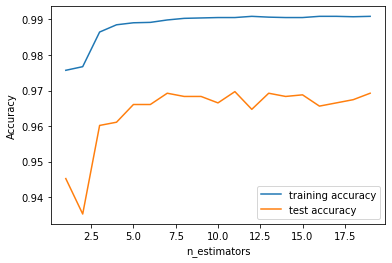

In [51]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [52]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [53]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [54]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [55]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [56]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



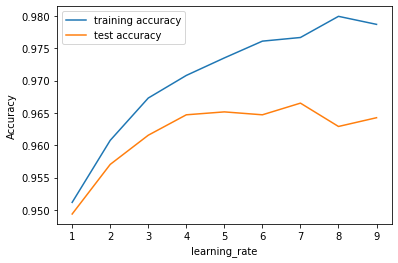

In [57]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

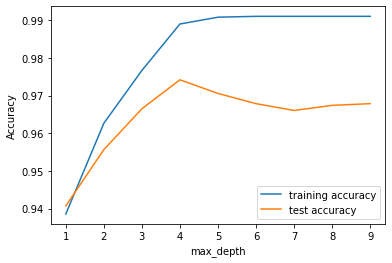

In [58]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [59]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [60]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5487232	total: 160ms	remaining: 2m 39s
1:	learn: 0.4349357	total: 175ms	remaining: 1m 27s
2:	learn: 0.3609236	total: 190ms	remaining: 1m 3s
3:	learn: 0.3050829	total: 203ms	remaining: 50.7s
4:	learn: 0.2766620	total: 213ms	remaining: 42.4s
5:	learn: 0.2475476	total: 224ms	remaining: 37.2s
6:	learn: 0.2286637	total: 234ms	remaining: 33.3s
7:	learn: 0.2138754	total: 244ms	remaining: 30.2s
8:	learn: 0.2013643	total: 254ms	remaining: 28s
9:	learn: 0.1896378	total: 265ms	remaining: 26.2s
10:	learn: 0.1819539	total: 275ms	remaining: 24.7s
11:	learn: 0.1767867	total: 285ms	remaining: 23.5s
12:	learn: 0.1727735	total: 294ms	remaining: 22.3s
13:	learn: 0.1682578	total: 307ms	remaining: 21.6s
14:	learn: 0.1641759	total: 322ms	remaining: 21.2s
15:	learn: 0.1614218	total: 336ms	remaining: 20.7s
16:	learn: 0.1558968	total: 347ms	remaining: 20.1s
17:	learn: 0.1535881	total: 355ms	remaining: 19.3s
18:	learn: 0.1514228	total: 362ms	remaining: 18.7s
19:	learn: 0.1482580	total: 368ms	remaini

162:	learn: 0.0558560	total: 1.07s	remaining: 5.48s
163:	learn: 0.0554512	total: 1.07s	remaining: 5.47s
164:	learn: 0.0552806	total: 1.08s	remaining: 5.45s
165:	learn: 0.0550538	total: 1.08s	remaining: 5.44s
166:	learn: 0.0548825	total: 1.09s	remaining: 5.43s
167:	learn: 0.0547805	total: 1.09s	remaining: 5.41s
168:	learn: 0.0546642	total: 1.1s	remaining: 5.39s
169:	learn: 0.0543574	total: 1.1s	remaining: 5.38s
170:	learn: 0.0542539	total: 1.11s	remaining: 5.37s
171:	learn: 0.0540977	total: 1.11s	remaining: 5.35s
172:	learn: 0.0539741	total: 1.12s	remaining: 5.34s
173:	learn: 0.0537793	total: 1.12s	remaining: 5.33s
174:	learn: 0.0535499	total: 1.13s	remaining: 5.31s
175:	learn: 0.0533461	total: 1.13s	remaining: 5.3s
176:	learn: 0.0531326	total: 1.14s	remaining: 5.29s
177:	learn: 0.0530595	total: 1.14s	remaining: 5.27s
178:	learn: 0.0529470	total: 1.15s	remaining: 5.26s
179:	learn: 0.0527691	total: 1.15s	remaining: 5.25s
180:	learn: 0.0526404	total: 1.16s	remaining: 5.24s
181:	learn: 0.0

323:	learn: 0.0364542	total: 2.16s	remaining: 4.51s
324:	learn: 0.0364204	total: 2.17s	remaining: 4.51s
325:	learn: 0.0363625	total: 2.18s	remaining: 4.51s
326:	learn: 0.0362867	total: 2.19s	remaining: 4.5s
327:	learn: 0.0362404	total: 2.19s	remaining: 4.5s
328:	learn: 0.0361574	total: 2.2s	remaining: 4.49s
329:	learn: 0.0361096	total: 2.21s	remaining: 4.49s
330:	learn: 0.0360786	total: 2.22s	remaining: 4.48s
331:	learn: 0.0360080	total: 2.22s	remaining: 4.48s
332:	learn: 0.0359705	total: 2.23s	remaining: 4.47s
333:	learn: 0.0359041	total: 2.25s	remaining: 4.48s
334:	learn: 0.0358134	total: 2.26s	remaining: 4.49s
335:	learn: 0.0357625	total: 2.27s	remaining: 4.48s
336:	learn: 0.0356498	total: 2.28s	remaining: 4.48s
337:	learn: 0.0355630	total: 2.29s	remaining: 4.48s
338:	learn: 0.0354664	total: 2.3s	remaining: 4.48s
339:	learn: 0.0354328	total: 2.31s	remaining: 4.48s
340:	learn: 0.0353908	total: 2.31s	remaining: 4.47s
341:	learn: 0.0353248	total: 2.32s	remaining: 4.47s
342:	learn: 0.03

508:	learn: 0.0282995	total: 3.63s	remaining: 3.5s
509:	learn: 0.0282783	total: 3.64s	remaining: 3.5s
510:	learn: 0.0282568	total: 3.65s	remaining: 3.49s
511:	learn: 0.0281979	total: 3.65s	remaining: 3.48s
512:	learn: 0.0281211	total: 3.66s	remaining: 3.47s
513:	learn: 0.0280864	total: 3.66s	remaining: 3.46s
514:	learn: 0.0280602	total: 3.67s	remaining: 3.46s
515:	learn: 0.0280478	total: 3.68s	remaining: 3.45s
516:	learn: 0.0280324	total: 3.69s	remaining: 3.45s
517:	learn: 0.0279982	total: 3.7s	remaining: 3.44s
518:	learn: 0.0279833	total: 3.71s	remaining: 3.43s
519:	learn: 0.0279698	total: 3.71s	remaining: 3.43s
520:	learn: 0.0279248	total: 3.72s	remaining: 3.42s
521:	learn: 0.0279247	total: 3.73s	remaining: 3.42s
522:	learn: 0.0279247	total: 3.74s	remaining: 3.41s
523:	learn: 0.0279246	total: 3.74s	remaining: 3.4s
524:	learn: 0.0279246	total: 3.75s	remaining: 3.39s
525:	learn: 0.0279246	total: 3.75s	remaining: 3.38s
526:	learn: 0.0279246	total: 3.76s	remaining: 3.38s
527:	learn: 0.02

672:	learn: 0.0256340	total: 4.71s	remaining: 2.29s
673:	learn: 0.0256340	total: 4.72s	remaining: 2.28s
674:	learn: 0.0256341	total: 4.72s	remaining: 2.27s
675:	learn: 0.0256340	total: 4.73s	remaining: 2.27s
676:	learn: 0.0256212	total: 4.73s	remaining: 2.26s
677:	learn: 0.0256175	total: 4.74s	remaining: 2.25s
678:	learn: 0.0256062	total: 4.75s	remaining: 2.24s
679:	learn: 0.0255903	total: 4.75s	remaining: 2.24s
680:	learn: 0.0255902	total: 4.76s	remaining: 2.23s
681:	learn: 0.0255652	total: 4.77s	remaining: 2.22s
682:	learn: 0.0255530	total: 4.77s	remaining: 2.21s
683:	learn: 0.0255364	total: 4.78s	remaining: 2.21s
684:	learn: 0.0255109	total: 4.79s	remaining: 2.2s
685:	learn: 0.0255052	total: 4.79s	remaining: 2.19s
686:	learn: 0.0254908	total: 4.8s	remaining: 2.19s
687:	learn: 0.0254868	total: 4.8s	remaining: 2.18s
688:	learn: 0.0254851	total: 4.81s	remaining: 2.17s
689:	learn: 0.0254850	total: 4.82s	remaining: 2.16s
690:	learn: 0.0254850	total: 4.82s	remaining: 2.16s
691:	learn: 0.0

849:	learn: 0.0248535	total: 5.77s	remaining: 1.02s
850:	learn: 0.0248534	total: 5.78s	remaining: 1.01s
851:	learn: 0.0248534	total: 5.78s	remaining: 1s
852:	learn: 0.0248533	total: 5.79s	remaining: 997ms
853:	learn: 0.0248534	total: 5.79s	remaining: 990ms
854:	learn: 0.0248533	total: 5.8s	remaining: 983ms
855:	learn: 0.0248532	total: 5.8s	remaining: 976ms
856:	learn: 0.0248533	total: 5.81s	remaining: 969ms
857:	learn: 0.0248532	total: 5.81s	remaining: 962ms
858:	learn: 0.0248532	total: 5.82s	remaining: 955ms
859:	learn: 0.0248532	total: 5.82s	remaining: 948ms
860:	learn: 0.0248532	total: 5.83s	remaining: 941ms
861:	learn: 0.0248332	total: 5.83s	remaining: 934ms
862:	learn: 0.0248332	total: 5.84s	remaining: 927ms
863:	learn: 0.0248203	total: 5.84s	remaining: 920ms
864:	learn: 0.0248183	total: 5.85s	remaining: 913ms
865:	learn: 0.0247978	total: 5.86s	remaining: 906ms
866:	learn: 0.0247848	total: 5.86s	remaining: 899ms
867:	learn: 0.0247847	total: 5.87s	remaining: 893ms
868:	learn: 0.024

In [61]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [62]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [63]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [64]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 6.21ms	remaining: 6.21s
1:	learn: 0.4349357	total: 20.6ms	remaining: 10.3s
2:	learn: 0.3609236	total: 32.2ms	remaining: 10.7s
3:	learn: 0.3050829	total: 41ms	remaining: 10.2s
4:	learn: 0.2766620	total: 50.1ms	remaining: 9.98s
5:	learn: 0.2475476	total: 61ms	remaining: 10.1s
6:	learn: 0.2286637	total: 70.9ms	remaining: 10.1s
7:	learn: 0.2138754	total: 81.7ms	remaining: 10.1s
8:	learn: 0.2013643	total: 91ms	remaining: 10s
9:	learn: 0.1896378	total: 98.5ms	remaining: 9.75s
10:	learn: 0.1819539	total: 107ms	remaining: 9.59s
11:	learn: 0.1767867	total: 115ms	remaining: 9.51s
12:	learn: 0.1727735	total: 126ms	remaining: 9.57s
13:	learn: 0.1682578	total: 135ms	remaining: 9.47s
14:	learn: 0.1641759	total: 149ms	remaining: 9.79s
15:	learn: 0.1614218	total: 164ms	remaining: 10.1s
16:	learn: 0.1558968	total: 173ms	remaining: 10s
17:	learn: 0.1535881	total: 185ms	remaining: 10.1s
18:	learn: 0.1514228	total: 195ms	remaining: 10.1s
19:	learn: 0.1482580	total: 207ms	remaini

167:	learn: 0.0547805	total: 1.37s	remaining: 6.79s
168:	learn: 0.0546642	total: 1.38s	remaining: 6.77s
169:	learn: 0.0543574	total: 1.39s	remaining: 6.77s
170:	learn: 0.0542539	total: 1.39s	remaining: 6.76s
171:	learn: 0.0540977	total: 1.41s	remaining: 6.76s
172:	learn: 0.0539741	total: 1.41s	remaining: 6.75s
173:	learn: 0.0537793	total: 1.42s	remaining: 6.75s
174:	learn: 0.0535499	total: 1.43s	remaining: 6.73s
175:	learn: 0.0533461	total: 1.44s	remaining: 6.72s
176:	learn: 0.0531326	total: 1.44s	remaining: 6.7s
177:	learn: 0.0530595	total: 1.45s	remaining: 6.69s
178:	learn: 0.0529470	total: 1.46s	remaining: 6.67s
179:	learn: 0.0527691	total: 1.46s	remaining: 6.67s
180:	learn: 0.0526404	total: 1.47s	remaining: 6.65s
181:	learn: 0.0525145	total: 1.48s	remaining: 6.66s
182:	learn: 0.0524332	total: 1.49s	remaining: 6.64s
183:	learn: 0.0522311	total: 1.5s	remaining: 6.63s
184:	learn: 0.0519353	total: 1.5s	remaining: 6.62s
185:	learn: 0.0515714	total: 1.51s	remaining: 6.61s
186:	learn: 0.0

327:	learn: 0.0362404	total: 2.65s	remaining: 5.43s
328:	learn: 0.0361574	total: 2.66s	remaining: 5.42s
329:	learn: 0.0361096	total: 2.67s	remaining: 5.42s
330:	learn: 0.0360786	total: 2.68s	remaining: 5.41s
331:	learn: 0.0360080	total: 2.68s	remaining: 5.4s
332:	learn: 0.0359705	total: 2.69s	remaining: 5.39s
333:	learn: 0.0359041	total: 2.7s	remaining: 5.38s
334:	learn: 0.0358134	total: 2.71s	remaining: 5.38s
335:	learn: 0.0357625	total: 2.72s	remaining: 5.37s
336:	learn: 0.0356498	total: 2.72s	remaining: 5.36s
337:	learn: 0.0355630	total: 2.73s	remaining: 5.35s
338:	learn: 0.0354664	total: 2.74s	remaining: 5.34s
339:	learn: 0.0354328	total: 2.75s	remaining: 5.33s
340:	learn: 0.0353908	total: 2.75s	remaining: 5.32s
341:	learn: 0.0353248	total: 2.76s	remaining: 5.31s
342:	learn: 0.0352669	total: 2.77s	remaining: 5.3s
343:	learn: 0.0352172	total: 2.77s	remaining: 5.29s
344:	learn: 0.0351687	total: 2.78s	remaining: 5.28s
345:	learn: 0.0351475	total: 2.79s	remaining: 5.28s
346:	learn: 0.0

488:	learn: 0.0287586	total: 3.95s	remaining: 4.13s
489:	learn: 0.0286968	total: 3.96s	remaining: 4.12s
490:	learn: 0.0286539	total: 3.96s	remaining: 4.11s
491:	learn: 0.0286538	total: 3.97s	remaining: 4.1s
492:	learn: 0.0286356	total: 3.98s	remaining: 4.09s
493:	learn: 0.0286061	total: 3.98s	remaining: 4.08s
494:	learn: 0.0285691	total: 3.99s	remaining: 4.07s
495:	learn: 0.0285441	total: 4s	remaining: 4.06s
496:	learn: 0.0285307	total: 4s	remaining: 4.05s
497:	learn: 0.0285271	total: 4.01s	remaining: 4.04s
498:	learn: 0.0285108	total: 4.02s	remaining: 4.03s
499:	learn: 0.0285107	total: 4.02s	remaining: 4.02s
500:	learn: 0.0284578	total: 4.03s	remaining: 4.01s
501:	learn: 0.0284303	total: 4.04s	remaining: 4.01s
502:	learn: 0.0283938	total: 4.04s	remaining: 4s
503:	learn: 0.0283746	total: 4.05s	remaining: 3.99s
504:	learn: 0.0283744	total: 4.06s	remaining: 3.98s
505:	learn: 0.0283597	total: 4.07s	remaining: 3.97s
506:	learn: 0.0283347	total: 4.08s	remaining: 3.96s
507:	learn: 0.0283150	

659:	learn: 0.0256554	total: 5.14s	remaining: 2.65s
660:	learn: 0.0256554	total: 5.15s	remaining: 2.64s
661:	learn: 0.0256554	total: 5.16s	remaining: 2.63s
662:	learn: 0.0256554	total: 5.16s	remaining: 2.62s
663:	learn: 0.0256554	total: 5.17s	remaining: 2.61s
664:	learn: 0.0256554	total: 5.17s	remaining: 2.6s
665:	learn: 0.0256410	total: 5.18s	remaining: 2.6s
666:	learn: 0.0256409	total: 5.18s	remaining: 2.59s
667:	learn: 0.0256409	total: 5.19s	remaining: 2.58s
668:	learn: 0.0256405	total: 5.19s	remaining: 2.57s
669:	learn: 0.0256402	total: 5.2s	remaining: 2.56s
670:	learn: 0.0256341	total: 5.21s	remaining: 2.55s
671:	learn: 0.0256340	total: 5.21s	remaining: 2.54s
672:	learn: 0.0256340	total: 5.22s	remaining: 2.54s
673:	learn: 0.0256340	total: 5.22s	remaining: 2.53s
674:	learn: 0.0256341	total: 5.23s	remaining: 2.52s
675:	learn: 0.0256340	total: 5.23s	remaining: 2.51s
676:	learn: 0.0256212	total: 5.24s	remaining: 2.5s
677:	learn: 0.0256175	total: 5.24s	remaining: 2.49s
678:	learn: 0.02

818:	learn: 0.0248659	total: 6.1s	remaining: 1.35s
819:	learn: 0.0248659	total: 6.1s	remaining: 1.34s
820:	learn: 0.0248625	total: 6.11s	remaining: 1.33s
821:	learn: 0.0248625	total: 6.11s	remaining: 1.32s
822:	learn: 0.0248625	total: 6.12s	remaining: 1.32s
823:	learn: 0.0248625	total: 6.13s	remaining: 1.31s
824:	learn: 0.0248624	total: 6.13s	remaining: 1.3s
825:	learn: 0.0248624	total: 6.14s	remaining: 1.29s
826:	learn: 0.0248624	total: 6.14s	remaining: 1.28s
827:	learn: 0.0248540	total: 6.15s	remaining: 1.28s
828:	learn: 0.0248539	total: 6.16s	remaining: 1.27s
829:	learn: 0.0248539	total: 6.16s	remaining: 1.26s
830:	learn: 0.0248539	total: 6.17s	remaining: 1.25s
831:	learn: 0.0248539	total: 6.17s	remaining: 1.25s
832:	learn: 0.0248539	total: 6.18s	remaining: 1.24s
833:	learn: 0.0248539	total: 6.19s	remaining: 1.23s
834:	learn: 0.0248538	total: 6.19s	remaining: 1.22s
835:	learn: 0.0248538	total: 6.2s	remaining: 1.22s
836:	learn: 0.0248538	total: 6.2s	remaining: 1.21s
837:	learn: 0.024

977:	learn: 0.0246130	total: 7.13s	remaining: 160ms
978:	learn: 0.0246129	total: 7.13s	remaining: 153ms
979:	learn: 0.0246129	total: 7.13s	remaining: 146ms
980:	learn: 0.0246128	total: 7.14s	remaining: 138ms
981:	learn: 0.0246128	total: 7.14s	remaining: 131ms
982:	learn: 0.0246128	total: 7.15s	remaining: 124ms
983:	learn: 0.0246128	total: 7.15s	remaining: 116ms
984:	learn: 0.0246128	total: 7.16s	remaining: 109ms
985:	learn: 0.0246126	total: 7.16s	remaining: 102ms
986:	learn: 0.0246126	total: 7.17s	remaining: 94.4ms
987:	learn: 0.0246126	total: 7.17s	remaining: 87.1ms
988:	learn: 0.0246126	total: 7.18s	remaining: 79.8ms
989:	learn: 0.0246125	total: 7.18s	remaining: 72.6ms
990:	learn: 0.0246125	total: 7.19s	remaining: 65.3ms
991:	learn: 0.0246125	total: 7.19s	remaining: 58ms
992:	learn: 0.0246125	total: 7.2s	remaining: 50.7ms
993:	learn: 0.0246124	total: 7.2s	remaining: 43.5ms
994:	learn: 0.0245995	total: 7.21s	remaining: 36.2ms
995:	learn: 0.0245994	total: 7.21s	remaining: 29ms
996:	lea

145:	learn: 0.0386311	total: 914ms	remaining: 5.35s
146:	learn: 0.0385427	total: 921ms	remaining: 5.34s
147:	learn: 0.0383702	total: 928ms	remaining: 5.34s
148:	learn: 0.0382869	total: 934ms	remaining: 5.34s
149:	learn: 0.0382111	total: 940ms	remaining: 5.33s
150:	learn: 0.0380592	total: 946ms	remaining: 5.32s
151:	learn: 0.0379038	total: 952ms	remaining: 5.31s
152:	learn: 0.0377535	total: 957ms	remaining: 5.3s
153:	learn: 0.0377099	total: 964ms	remaining: 5.29s
154:	learn: 0.0375535	total: 969ms	remaining: 5.28s
155:	learn: 0.0373419	total: 975ms	remaining: 5.28s
156:	learn: 0.0371427	total: 981ms	remaining: 5.26s
157:	learn: 0.0370333	total: 987ms	remaining: 5.26s
158:	learn: 0.0368628	total: 994ms	remaining: 5.25s
159:	learn: 0.0367492	total: 1000ms	remaining: 5.25s
160:	learn: 0.0366550	total: 1s	remaining: 5.24s
161:	learn: 0.0364480	total: 1.01s	remaining: 5.24s
162:	learn: 0.0362122	total: 1.02s	remaining: 5.23s
163:	learn: 0.0360912	total: 1.02s	remaining: 5.23s
164:	learn: 0.0

319:	learn: 0.0259148	total: 1.99s	remaining: 4.23s
320:	learn: 0.0259101	total: 1.99s	remaining: 4.22s
321:	learn: 0.0259101	total: 2s	remaining: 4.21s
322:	learn: 0.0258802	total: 2s	remaining: 4.2s
323:	learn: 0.0258077	total: 2.01s	remaining: 4.2s
324:	learn: 0.0258076	total: 2.02s	remaining: 4.19s
325:	learn: 0.0258076	total: 2.02s	remaining: 4.18s
326:	learn: 0.0258076	total: 2.03s	remaining: 4.18s
327:	learn: 0.0257853	total: 2.04s	remaining: 4.17s
328:	learn: 0.0257155	total: 2.04s	remaining: 4.17s
329:	learn: 0.0257155	total: 2.05s	remaining: 4.16s
330:	learn: 0.0255776	total: 2.06s	remaining: 4.16s
331:	learn: 0.0255264	total: 2.06s	remaining: 4.15s
332:	learn: 0.0254970	total: 2.07s	remaining: 4.15s
333:	learn: 0.0254646	total: 2.08s	remaining: 4.15s
334:	learn: 0.0254645	total: 2.09s	remaining: 4.14s
335:	learn: 0.0254645	total: 2.09s	remaining: 4.13s
336:	learn: 0.0254645	total: 2.1s	remaining: 4.13s
337:	learn: 0.0254644	total: 2.1s	remaining: 4.12s
338:	learn: 0.0254643	

498:	learn: 0.0244061	total: 3.06s	remaining: 3.08s
499:	learn: 0.0244061	total: 3.07s	remaining: 3.07s
500:	learn: 0.0244061	total: 3.07s	remaining: 3.06s
501:	learn: 0.0244061	total: 3.08s	remaining: 3.05s
502:	learn: 0.0244061	total: 3.08s	remaining: 3.04s
503:	learn: 0.0244055	total: 3.09s	remaining: 3.04s
504:	learn: 0.0244056	total: 3.09s	remaining: 3.03s
505:	learn: 0.0244055	total: 3.1s	remaining: 3.02s
506:	learn: 0.0244054	total: 3.1s	remaining: 3.02s
507:	learn: 0.0244054	total: 3.1s	remaining: 3.01s
508:	learn: 0.0244054	total: 3.11s	remaining: 3s
509:	learn: 0.0244054	total: 3.11s	remaining: 2.99s
510:	learn: 0.0244053	total: 3.12s	remaining: 2.98s
511:	learn: 0.0244053	total: 3.12s	remaining: 2.98s
512:	learn: 0.0244053	total: 3.13s	remaining: 2.97s
513:	learn: 0.0244053	total: 3.13s	remaining: 2.96s
514:	learn: 0.0244052	total: 3.13s	remaining: 2.95s
515:	learn: 0.0244053	total: 3.14s	remaining: 2.94s
516:	learn: 0.0244052	total: 3.14s	remaining: 2.94s
517:	learn: 0.0244

680:	learn: 0.0241364	total: 3.95s	remaining: 1.85s
681:	learn: 0.0241364	total: 3.95s	remaining: 1.84s
682:	learn: 0.0241364	total: 3.96s	remaining: 1.84s
683:	learn: 0.0241364	total: 3.96s	remaining: 1.83s
684:	learn: 0.0241364	total: 3.97s	remaining: 1.82s
685:	learn: 0.0241363	total: 3.98s	remaining: 1.82s
686:	learn: 0.0241363	total: 3.98s	remaining: 1.81s
687:	learn: 0.0241363	total: 3.99s	remaining: 1.81s
688:	learn: 0.0241360	total: 4s	remaining: 1.8s
689:	learn: 0.0241359	total: 4s	remaining: 1.8s
690:	learn: 0.0241359	total: 4.01s	remaining: 1.79s
691:	learn: 0.0241356	total: 4.01s	remaining: 1.79s
692:	learn: 0.0241355	total: 4.02s	remaining: 1.78s
693:	learn: 0.0241354	total: 4.03s	remaining: 1.77s
694:	learn: 0.0241354	total: 4.03s	remaining: 1.77s
695:	learn: 0.0241353	total: 4.04s	remaining: 1.76s
696:	learn: 0.0241353	total: 4.04s	remaining: 1.76s
697:	learn: 0.0241353	total: 4.05s	remaining: 1.75s
698:	learn: 0.0241353	total: 4.05s	remaining: 1.75s
699:	learn: 0.024135

846:	learn: 0.0241045	total: 4.84s	remaining: 874ms
847:	learn: 0.0241045	total: 4.84s	remaining: 868ms
848:	learn: 0.0241044	total: 4.85s	remaining: 862ms
849:	learn: 0.0241044	total: 4.85s	remaining: 857ms
850:	learn: 0.0241044	total: 4.86s	remaining: 851ms
851:	learn: 0.0241044	total: 4.86s	remaining: 845ms
852:	learn: 0.0241044	total: 4.87s	remaining: 839ms
853:	learn: 0.0241043	total: 4.88s	remaining: 834ms
854:	learn: 0.0240699	total: 4.88s	remaining: 828ms
855:	learn: 0.0240699	total: 4.89s	remaining: 822ms
856:	learn: 0.0240699	total: 4.89s	remaining: 816ms
857:	learn: 0.0240698	total: 4.9s	remaining: 811ms
858:	learn: 0.0240698	total: 4.9s	remaining: 805ms
859:	learn: 0.0240698	total: 4.91s	remaining: 799ms
860:	learn: 0.0240698	total: 4.91s	remaining: 793ms
861:	learn: 0.0240698	total: 4.92s	remaining: 788ms
862:	learn: 0.0240697	total: 4.93s	remaining: 782ms
863:	learn: 0.0240697	total: 4.93s	remaining: 776ms
864:	learn: 0.0240697	total: 4.94s	remaining: 771ms
865:	learn: 0.

29:	learn: 0.0822894	total: 177ms	remaining: 5.71s
30:	learn: 0.0809274	total: 182ms	remaining: 5.68s
31:	learn: 0.0798100	total: 188ms	remaining: 5.69s
32:	learn: 0.0790440	total: 194ms	remaining: 5.68s
33:	learn: 0.0771472	total: 199ms	remaining: 5.65s
34:	learn: 0.0762622	total: 204ms	remaining: 5.62s
35:	learn: 0.0749734	total: 209ms	remaining: 5.6s
36:	learn: 0.0740987	total: 214ms	remaining: 5.57s
37:	learn: 0.0727211	total: 219ms	remaining: 5.54s
38:	learn: 0.0717095	total: 224ms	remaining: 5.51s
39:	learn: 0.0699837	total: 228ms	remaining: 5.48s
40:	learn: 0.0691923	total: 234ms	remaining: 5.46s
41:	learn: 0.0681980	total: 239ms	remaining: 5.45s
42:	learn: 0.0672333	total: 244ms	remaining: 5.42s
43:	learn: 0.0662232	total: 249ms	remaining: 5.4s
44:	learn: 0.0653693	total: 254ms	remaining: 5.39s
45:	learn: 0.0638391	total: 259ms	remaining: 5.37s
46:	learn: 0.0631620	total: 264ms	remaining: 5.35s
47:	learn: 0.0620032	total: 269ms	remaining: 5.33s
48:	learn: 0.0614617	total: 274ms

190:	learn: 0.0263645	total: 1.07s	remaining: 4.55s
191:	learn: 0.0263643	total: 1.08s	remaining: 4.54s
192:	learn: 0.0263295	total: 1.08s	remaining: 4.54s
193:	learn: 0.0262429	total: 1.1s	remaining: 4.56s
194:	learn: 0.0261811	total: 1.1s	remaining: 4.56s
195:	learn: 0.0260969	total: 1.11s	remaining: 4.56s
196:	learn: 0.0260466	total: 1.12s	remaining: 4.56s
197:	learn: 0.0260145	total: 1.13s	remaining: 4.57s
198:	learn: 0.0258970	total: 1.13s	remaining: 4.57s
199:	learn: 0.0258579	total: 1.14s	remaining: 4.56s
200:	learn: 0.0258577	total: 1.15s	remaining: 4.56s
201:	learn: 0.0258576	total: 1.15s	remaining: 4.55s
202:	learn: 0.0258195	total: 1.16s	remaining: 4.55s
203:	learn: 0.0256744	total: 1.16s	remaining: 4.54s
204:	learn: 0.0256187	total: 1.17s	remaining: 4.54s
205:	learn: 0.0256187	total: 1.17s	remaining: 4.52s
206:	learn: 0.0256187	total: 1.18s	remaining: 4.51s
207:	learn: 0.0256178	total: 1.18s	remaining: 4.51s
208:	learn: 0.0256177	total: 1.19s	remaining: 4.5s
209:	learn: 0.0

373:	learn: 0.0244337	total: 1.96s	remaining: 3.28s
374:	learn: 0.0244335	total: 1.97s	remaining: 3.28s
375:	learn: 0.0244335	total: 1.97s	remaining: 3.27s
376:	learn: 0.0244334	total: 1.98s	remaining: 3.27s
377:	learn: 0.0244334	total: 1.98s	remaining: 3.26s
378:	learn: 0.0244333	total: 1.99s	remaining: 3.26s
379:	learn: 0.0244332	total: 1.99s	remaining: 3.25s
380:	learn: 0.0244332	total: 2s	remaining: 3.25s
381:	learn: 0.0244332	total: 2s	remaining: 3.24s
382:	learn: 0.0244331	total: 2.01s	remaining: 3.24s
383:	learn: 0.0244330	total: 2.01s	remaining: 3.23s
384:	learn: 0.0244329	total: 2.02s	remaining: 3.23s
385:	learn: 0.0244329	total: 2.02s	remaining: 3.22s
386:	learn: 0.0244329	total: 2.03s	remaining: 3.21s
387:	learn: 0.0244327	total: 2.04s	remaining: 3.21s
388:	learn: 0.0244327	total: 2.04s	remaining: 3.2s
389:	learn: 0.0244325	total: 2.04s	remaining: 3.2s
390:	learn: 0.0244324	total: 2.05s	remaining: 3.19s
391:	learn: 0.0244322	total: 2.06s	remaining: 3.19s
392:	learn: 0.024432

542:	learn: 0.0236378	total: 2.85s	remaining: 2.4s
543:	learn: 0.0236377	total: 2.86s	remaining: 2.4s
544:	learn: 0.0236376	total: 2.86s	remaining: 2.39s
545:	learn: 0.0236376	total: 2.87s	remaining: 2.38s
546:	learn: 0.0236375	total: 2.87s	remaining: 2.38s
547:	learn: 0.0236375	total: 2.88s	remaining: 2.37s
548:	learn: 0.0236375	total: 2.88s	remaining: 2.37s
549:	learn: 0.0236374	total: 2.89s	remaining: 2.36s
550:	learn: 0.0236374	total: 2.89s	remaining: 2.36s
551:	learn: 0.0236373	total: 2.9s	remaining: 2.35s
552:	learn: 0.0236372	total: 2.9s	remaining: 2.35s
553:	learn: 0.0236372	total: 2.91s	remaining: 2.34s
554:	learn: 0.0236372	total: 2.91s	remaining: 2.33s
555:	learn: 0.0236371	total: 2.92s	remaining: 2.33s
556:	learn: 0.0236371	total: 2.92s	remaining: 2.32s
557:	learn: 0.0236371	total: 2.92s	remaining: 2.32s
558:	learn: 0.0236370	total: 2.93s	remaining: 2.31s
559:	learn: 0.0236370	total: 2.93s	remaining: 2.3s
560:	learn: 0.0236370	total: 2.94s	remaining: 2.3s
561:	learn: 0.0236

707:	learn: 0.0232920	total: 3.74s	remaining: 1.54s
708:	learn: 0.0232920	total: 3.75s	remaining: 1.54s
709:	learn: 0.0232919	total: 3.75s	remaining: 1.53s
710:	learn: 0.0232920	total: 3.76s	remaining: 1.53s
711:	learn: 0.0232919	total: 3.77s	remaining: 1.52s
712:	learn: 0.0232917	total: 3.77s	remaining: 1.52s
713:	learn: 0.0232918	total: 3.78s	remaining: 1.51s
714:	learn: 0.0232912	total: 3.78s	remaining: 1.51s
715:	learn: 0.0232912	total: 3.79s	remaining: 1.5s
716:	learn: 0.0232911	total: 3.79s	remaining: 1.5s
717:	learn: 0.0232910	total: 3.8s	remaining: 1.49s
718:	learn: 0.0232910	total: 3.81s	remaining: 1.49s
719:	learn: 0.0232908	total: 3.81s	remaining: 1.48s
720:	learn: 0.0232908	total: 3.82s	remaining: 1.48s
721:	learn: 0.0232907	total: 3.82s	remaining: 1.47s
722:	learn: 0.0232906	total: 3.83s	remaining: 1.47s
723:	learn: 0.0232906	total: 3.83s	remaining: 1.46s
724:	learn: 0.0232901	total: 3.84s	remaining: 1.46s
725:	learn: 0.0232900	total: 3.85s	remaining: 1.45s
726:	learn: 0.0

872:	learn: 0.0230906	total: 4.63s	remaining: 674ms
873:	learn: 0.0230905	total: 4.64s	remaining: 669ms
874:	learn: 0.0230905	total: 4.64s	remaining: 664ms
875:	learn: 0.0230904	total: 4.65s	remaining: 658ms
876:	learn: 0.0230904	total: 4.66s	remaining: 653ms
877:	learn: 0.0230903	total: 4.66s	remaining: 648ms
878:	learn: 0.0230902	total: 4.67s	remaining: 643ms
879:	learn: 0.0230901	total: 4.67s	remaining: 637ms
880:	learn: 0.0230901	total: 4.68s	remaining: 632ms
881:	learn: 0.0230899	total: 4.68s	remaining: 627ms
882:	learn: 0.0230899	total: 4.69s	remaining: 621ms
883:	learn: 0.0230898	total: 4.7s	remaining: 616ms
884:	learn: 0.0230899	total: 4.7s	remaining: 611ms
885:	learn: 0.0230898	total: 4.71s	remaining: 605ms
886:	learn: 0.0230898	total: 4.71s	remaining: 600ms
887:	learn: 0.0230895	total: 4.72s	remaining: 595ms
888:	learn: 0.0230894	total: 4.72s	remaining: 590ms
889:	learn: 0.0230893	total: 4.73s	remaining: 584ms
890:	learn: 0.0230893	total: 4.73s	remaining: 579ms
891:	learn: 0.

38:	learn: 0.0562875	total: 266ms	remaining: 6.55s
39:	learn: 0.0554755	total: 271ms	remaining: 6.51s
40:	learn: 0.0547284	total: 277ms	remaining: 6.49s
41:	learn: 0.0539605	total: 283ms	remaining: 6.45s
42:	learn: 0.0531635	total: 289ms	remaining: 6.43s
43:	learn: 0.0523679	total: 295ms	remaining: 6.41s
44:	learn: 0.0510843	total: 301ms	remaining: 6.38s
45:	learn: 0.0504998	total: 308ms	remaining: 6.38s
46:	learn: 0.0500753	total: 313ms	remaining: 6.35s
47:	learn: 0.0495912	total: 319ms	remaining: 6.33s
48:	learn: 0.0492385	total: 325ms	remaining: 6.3s
49:	learn: 0.0487834	total: 330ms	remaining: 6.28s
50:	learn: 0.0478200	total: 336ms	remaining: 6.25s
51:	learn: 0.0471465	total: 341ms	remaining: 6.22s
52:	learn: 0.0467225	total: 347ms	remaining: 6.2s
53:	learn: 0.0460662	total: 353ms	remaining: 6.18s
54:	learn: 0.0453778	total: 359ms	remaining: 6.17s
55:	learn: 0.0450193	total: 367ms	remaining: 6.18s
56:	learn: 0.0449712	total: 374ms	remaining: 6.18s
57:	learn: 0.0445963	total: 380ms

205:	learn: 0.0241458	total: 1.54s	remaining: 5.94s
206:	learn: 0.0241457	total: 1.55s	remaining: 5.93s
207:	learn: 0.0241079	total: 1.55s	remaining: 5.92s
208:	learn: 0.0240423	total: 1.56s	remaining: 5.92s
209:	learn: 0.0240413	total: 1.57s	remaining: 5.9s
210:	learn: 0.0240413	total: 1.57s	remaining: 5.88s
211:	learn: 0.0240413	total: 1.58s	remaining: 5.86s
212:	learn: 0.0240413	total: 1.58s	remaining: 5.84s
213:	learn: 0.0240413	total: 1.58s	remaining: 5.82s
214:	learn: 0.0240412	total: 1.59s	remaining: 5.8s
215:	learn: 0.0240412	total: 1.59s	remaining: 5.79s
216:	learn: 0.0240413	total: 1.6s	remaining: 5.77s
217:	learn: 0.0240412	total: 1.6s	remaining: 5.75s
218:	learn: 0.0240394	total: 1.61s	remaining: 5.74s
219:	learn: 0.0239486	total: 1.61s	remaining: 5.73s
220:	learn: 0.0239020	total: 1.62s	remaining: 5.71s
221:	learn: 0.0239020	total: 1.63s	remaining: 5.7s
222:	learn: 0.0238877	total: 1.64s	remaining: 5.7s
223:	learn: 0.0238285	total: 1.64s	remaining: 5.7s
224:	learn: 0.02382

370:	learn: 0.0223178	total: 2.55s	remaining: 4.33s
371:	learn: 0.0223176	total: 2.56s	remaining: 4.32s
372:	learn: 0.0223175	total: 2.56s	remaining: 4.31s
373:	learn: 0.0223163	total: 2.57s	remaining: 4.3s
374:	learn: 0.0223080	total: 2.57s	remaining: 4.29s
375:	learn: 0.0223075	total: 2.58s	remaining: 4.28s
376:	learn: 0.0223074	total: 2.58s	remaining: 4.27s
377:	learn: 0.0223073	total: 2.59s	remaining: 4.26s
378:	learn: 0.0223073	total: 2.59s	remaining: 4.25s
379:	learn: 0.0223072	total: 2.6s	remaining: 4.24s
380:	learn: 0.0223071	total: 2.6s	remaining: 4.23s
381:	learn: 0.0223071	total: 2.61s	remaining: 4.22s
382:	learn: 0.0223067	total: 2.61s	remaining: 4.21s
383:	learn: 0.0223066	total: 2.62s	remaining: 4.2s
384:	learn: 0.0223063	total: 2.62s	remaining: 4.19s
385:	learn: 0.0223059	total: 2.63s	remaining: 4.18s
386:	learn: 0.0223058	total: 2.63s	remaining: 4.17s
387:	learn: 0.0223057	total: 2.63s	remaining: 4.16s
388:	learn: 0.0223057	total: 2.64s	remaining: 4.15s
389:	learn: 0.02

537:	learn: 0.0222639	total: 3.46s	remaining: 2.97s
538:	learn: 0.0222638	total: 3.47s	remaining: 2.97s
539:	learn: 0.0222638	total: 3.48s	remaining: 2.96s
540:	learn: 0.0222638	total: 3.49s	remaining: 2.96s
541:	learn: 0.0222637	total: 3.49s	remaining: 2.95s
542:	learn: 0.0222636	total: 3.5s	remaining: 2.95s
543:	learn: 0.0222636	total: 3.51s	remaining: 2.94s
544:	learn: 0.0222636	total: 3.52s	remaining: 2.94s
545:	learn: 0.0222635	total: 3.53s	remaining: 2.94s
546:	learn: 0.0222635	total: 3.54s	remaining: 2.93s
547:	learn: 0.0222633	total: 3.55s	remaining: 2.93s
548:	learn: 0.0222633	total: 3.56s	remaining: 2.92s
549:	learn: 0.0222632	total: 3.56s	remaining: 2.92s
550:	learn: 0.0222631	total: 3.57s	remaining: 2.91s
551:	learn: 0.0222631	total: 3.58s	remaining: 2.91s
552:	learn: 0.0222631	total: 3.59s	remaining: 2.9s
553:	learn: 0.0222630	total: 3.6s	remaining: 2.9s
554:	learn: 0.0222629	total: 3.61s	remaining: 2.89s
555:	learn: 0.0222630	total: 3.62s	remaining: 2.89s
556:	learn: 0.02

698:	learn: 0.0220633	total: 4.36s	remaining: 1.88s
699:	learn: 0.0220634	total: 4.37s	remaining: 1.87s
700:	learn: 0.0220634	total: 4.37s	remaining: 1.86s
701:	learn: 0.0220633	total: 4.38s	remaining: 1.86s
702:	learn: 0.0220633	total: 4.38s	remaining: 1.85s
703:	learn: 0.0220632	total: 4.39s	remaining: 1.84s
704:	learn: 0.0220632	total: 4.39s	remaining: 1.84s
705:	learn: 0.0220631	total: 4.4s	remaining: 1.83s
706:	learn: 0.0220630	total: 4.41s	remaining: 1.83s
707:	learn: 0.0220629	total: 4.41s	remaining: 1.82s
708:	learn: 0.0220614	total: 4.42s	remaining: 1.81s
709:	learn: 0.0220614	total: 4.42s	remaining: 1.8s
710:	learn: 0.0220612	total: 4.42s	remaining: 1.8s
711:	learn: 0.0220195	total: 4.43s	remaining: 1.79s
712:	learn: 0.0220194	total: 4.43s	remaining: 1.78s
713:	learn: 0.0220194	total: 4.44s	remaining: 1.78s
714:	learn: 0.0220194	total: 4.44s	remaining: 1.77s
715:	learn: 0.0220192	total: 4.45s	remaining: 1.76s
716:	learn: 0.0220192	total: 4.45s	remaining: 1.76s
717:	learn: 0.0

882:	learn: 0.0217508	total: 5.25s	remaining: 696ms
883:	learn: 0.0217507	total: 5.26s	remaining: 690ms
884:	learn: 0.0217505	total: 5.26s	remaining: 684ms
885:	learn: 0.0217505	total: 5.27s	remaining: 678ms
886:	learn: 0.0217503	total: 5.27s	remaining: 672ms
887:	learn: 0.0217503	total: 5.28s	remaining: 666ms
888:	learn: 0.0217503	total: 5.28s	remaining: 660ms
889:	learn: 0.0217501	total: 5.29s	remaining: 654ms
890:	learn: 0.0217500	total: 5.29s	remaining: 648ms
891:	learn: 0.0217501	total: 5.3s	remaining: 641ms
892:	learn: 0.0217500	total: 5.3s	remaining: 635ms
893:	learn: 0.0217498	total: 5.31s	remaining: 629ms
894:	learn: 0.0217498	total: 5.31s	remaining: 623ms
895:	learn: 0.0217497	total: 5.32s	remaining: 617ms
896:	learn: 0.0217494	total: 5.32s	remaining: 611ms
897:	learn: 0.0217493	total: 5.33s	remaining: 605ms
898:	learn: 0.0217493	total: 5.33s	remaining: 599ms
899:	learn: 0.0217492	total: 5.34s	remaining: 593ms
900:	learn: 0.0217492	total: 5.34s	remaining: 587ms
901:	learn: 0.

45:	learn: 0.0453535	total: 253ms	remaining: 5.24s
46:	learn: 0.0447119	total: 258ms	remaining: 5.22s
47:	learn: 0.0441907	total: 263ms	remaining: 5.22s
48:	learn: 0.0433201	total: 269ms	remaining: 5.21s
49:	learn: 0.0425312	total: 274ms	remaining: 5.2s
50:	learn: 0.0422220	total: 279ms	remaining: 5.2s
51:	learn: 0.0412308	total: 285ms	remaining: 5.2s
52:	learn: 0.0408255	total: 291ms	remaining: 5.19s
53:	learn: 0.0404125	total: 296ms	remaining: 5.18s
54:	learn: 0.0401080	total: 302ms	remaining: 5.19s
55:	learn: 0.0395782	total: 308ms	remaining: 5.19s
56:	learn: 0.0392575	total: 313ms	remaining: 5.18s
57:	learn: 0.0390648	total: 319ms	remaining: 5.19s
58:	learn: 0.0386932	total: 325ms	remaining: 5.18s
59:	learn: 0.0384202	total: 330ms	remaining: 5.17s
60:	learn: 0.0377615	total: 336ms	remaining: 5.17s
61:	learn: 0.0374140	total: 341ms	remaining: 5.16s
62:	learn: 0.0372581	total: 347ms	remaining: 5.16s
63:	learn: 0.0369419	total: 352ms	remaining: 5.15s
64:	learn: 0.0364398	total: 358ms	

221:	learn: 0.0227632	total: 1.14s	remaining: 4s
222:	learn: 0.0227019	total: 1.15s	remaining: 3.99s
223:	learn: 0.0225985	total: 1.15s	remaining: 3.99s
224:	learn: 0.0225982	total: 1.16s	remaining: 3.98s
225:	learn: 0.0225624	total: 1.16s	remaining: 3.97s
226:	learn: 0.0224551	total: 1.17s	remaining: 3.97s
227:	learn: 0.0224549	total: 1.17s	remaining: 3.96s
228:	learn: 0.0224546	total: 1.18s	remaining: 3.96s
229:	learn: 0.0224546	total: 1.18s	remaining: 3.95s
230:	learn: 0.0224546	total: 1.18s	remaining: 3.94s
231:	learn: 0.0224543	total: 1.19s	remaining: 3.95s
232:	learn: 0.0224541	total: 1.2s	remaining: 3.94s
233:	learn: 0.0224541	total: 1.2s	remaining: 3.93s
234:	learn: 0.0224540	total: 1.21s	remaining: 3.93s
235:	learn: 0.0224539	total: 1.21s	remaining: 3.92s
236:	learn: 0.0224533	total: 1.21s	remaining: 3.91s
237:	learn: 0.0224532	total: 1.22s	remaining: 3.9s
238:	learn: 0.0224532	total: 1.22s	remaining: 3.9s
239:	learn: 0.0223979	total: 1.23s	remaining: 3.89s
240:	learn: 0.02236

402:	learn: 0.0219223	total: 2.03s	remaining: 3s
403:	learn: 0.0219223	total: 2.03s	remaining: 3s
404:	learn: 0.0219223	total: 2.04s	remaining: 2.99s
405:	learn: 0.0219222	total: 2.04s	remaining: 2.99s
406:	learn: 0.0219221	total: 2.05s	remaining: 2.98s
407:	learn: 0.0219220	total: 2.05s	remaining: 2.98s
408:	learn: 0.0219219	total: 2.06s	remaining: 2.97s
409:	learn: 0.0219216	total: 2.06s	remaining: 2.96s
410:	learn: 0.0219216	total: 2.06s	remaining: 2.96s
411:	learn: 0.0219007	total: 2.07s	remaining: 2.96s
412:	learn: 0.0219007	total: 2.08s	remaining: 2.95s
413:	learn: 0.0219006	total: 2.08s	remaining: 2.94s
414:	learn: 0.0218816	total: 2.08s	remaining: 2.94s
415:	learn: 0.0218420	total: 2.09s	remaining: 2.93s
416:	learn: 0.0217442	total: 2.1s	remaining: 2.93s
417:	learn: 0.0216052	total: 2.1s	remaining: 2.92s
418:	learn: 0.0216050	total: 2.1s	remaining: 2.92s
419:	learn: 0.0216049	total: 2.11s	remaining: 2.91s
420:	learn: 0.0216048	total: 2.12s	remaining: 2.91s
421:	learn: 0.0216048

576:	learn: 0.0215924	total: 2.92s	remaining: 2.14s
577:	learn: 0.0215924	total: 2.92s	remaining: 2.14s
578:	learn: 0.0215922	total: 2.93s	remaining: 2.13s
579:	learn: 0.0215921	total: 2.94s	remaining: 2.13s
580:	learn: 0.0215919	total: 2.94s	remaining: 2.12s
581:	learn: 0.0215920	total: 2.95s	remaining: 2.12s
582:	learn: 0.0215919	total: 2.95s	remaining: 2.11s
583:	learn: 0.0215918	total: 2.96s	remaining: 2.11s
584:	learn: 0.0215918	total: 2.96s	remaining: 2.1s
585:	learn: 0.0215918	total: 2.97s	remaining: 2.1s
586:	learn: 0.0215916	total: 2.98s	remaining: 2.09s
587:	learn: 0.0215914	total: 2.98s	remaining: 2.09s
588:	learn: 0.0215914	total: 2.98s	remaining: 2.08s
589:	learn: 0.0215914	total: 2.99s	remaining: 2.08s
590:	learn: 0.0215913	total: 3s	remaining: 2.07s
591:	learn: 0.0215913	total: 3s	remaining: 2.07s
592:	learn: 0.0215913	total: 3.01s	remaining: 2.06s
593:	learn: 0.0215913	total: 3.01s	remaining: 2.06s
594:	learn: 0.0215897	total: 3.02s	remaining: 2.05s
595:	learn: 0.021589

735:	learn: 0.0214295	total: 3.81s	remaining: 1.37s
736:	learn: 0.0214294	total: 3.82s	remaining: 1.36s
737:	learn: 0.0214294	total: 3.82s	remaining: 1.36s
738:	learn: 0.0214293	total: 3.83s	remaining: 1.35s
739:	learn: 0.0214293	total: 3.83s	remaining: 1.35s
740:	learn: 0.0214292	total: 3.84s	remaining: 1.34s
741:	learn: 0.0214292	total: 3.84s	remaining: 1.33s
742:	learn: 0.0214290	total: 3.85s	remaining: 1.33s
743:	learn: 0.0214290	total: 3.85s	remaining: 1.32s
744:	learn: 0.0214289	total: 3.85s	remaining: 1.32s
745:	learn: 0.0214288	total: 3.86s	remaining: 1.31s
746:	learn: 0.0214287	total: 3.86s	remaining: 1.31s
747:	learn: 0.0214287	total: 3.87s	remaining: 1.3s
748:	learn: 0.0214286	total: 3.87s	remaining: 1.3s
749:	learn: 0.0214286	total: 3.88s	remaining: 1.29s
750:	learn: 0.0214285	total: 3.88s	remaining: 1.29s
751:	learn: 0.0214285	total: 3.89s	remaining: 1.28s
752:	learn: 0.0214284	total: 3.89s	remaining: 1.28s
753:	learn: 0.0214284	total: 3.9s	remaining: 1.27s
754:	learn: 0.0

896:	learn: 0.0213807	total: 4.52s	remaining: 519ms
897:	learn: 0.0213805	total: 4.52s	remaining: 514ms
898:	learn: 0.0213804	total: 4.53s	remaining: 509ms
899:	learn: 0.0213804	total: 4.53s	remaining: 504ms
900:	learn: 0.0213802	total: 4.54s	remaining: 499ms
901:	learn: 0.0213801	total: 4.54s	remaining: 493ms
902:	learn: 0.0213800	total: 4.55s	remaining: 488ms
903:	learn: 0.0213798	total: 4.55s	remaining: 483ms
904:	learn: 0.0213799	total: 4.55s	remaining: 478ms
905:	learn: 0.0213798	total: 4.56s	remaining: 473ms
906:	learn: 0.0213797	total: 4.56s	remaining: 468ms
907:	learn: 0.0213796	total: 4.57s	remaining: 463ms
908:	learn: 0.0213795	total: 4.57s	remaining: 458ms
909:	learn: 0.0213794	total: 4.58s	remaining: 453ms
910:	learn: 0.0213794	total: 4.58s	remaining: 448ms
911:	learn: 0.0213794	total: 4.59s	remaining: 443ms
912:	learn: 0.0213792	total: 4.59s	remaining: 437ms
913:	learn: 0.0213791	total: 4.59s	remaining: 432ms
914:	learn: 0.0213790	total: 4.6s	remaining: 427ms
915:	learn: 0

63:	learn: 0.0327434	total: 367ms	remaining: 5.37s
64:	learn: 0.0325530	total: 373ms	remaining: 5.37s
65:	learn: 0.0323392	total: 379ms	remaining: 5.36s
66:	learn: 0.0317270	total: 385ms	remaining: 5.35s
67:	learn: 0.0312979	total: 391ms	remaining: 5.35s
68:	learn: 0.0305810	total: 396ms	remaining: 5.35s
69:	learn: 0.0304994	total: 402ms	remaining: 5.34s
70:	learn: 0.0303185	total: 408ms	remaining: 5.34s
71:	learn: 0.0300084	total: 415ms	remaining: 5.35s
72:	learn: 0.0297667	total: 421ms	remaining: 5.34s
73:	learn: 0.0296005	total: 427ms	remaining: 5.34s
74:	learn: 0.0294664	total: 432ms	remaining: 5.33s
75:	learn: 0.0290216	total: 438ms	remaining: 5.32s
76:	learn: 0.0287365	total: 444ms	remaining: 5.32s
77:	learn: 0.0285612	total: 450ms	remaining: 5.32s
78:	learn: 0.0282720	total: 456ms	remaining: 5.31s
79:	learn: 0.0280866	total: 462ms	remaining: 5.31s
80:	learn: 0.0279603	total: 467ms	remaining: 5.3s
81:	learn: 0.0278472	total: 474ms	remaining: 5.3s
82:	learn: 0.0276967	total: 480ms

224:	learn: 0.0224794	total: 1.27s	remaining: 4.37s
225:	learn: 0.0224794	total: 1.27s	remaining: 4.36s
226:	learn: 0.0224794	total: 1.28s	remaining: 4.35s
227:	learn: 0.0224794	total: 1.28s	remaining: 4.34s
228:	learn: 0.0224791	total: 1.29s	remaining: 4.34s
229:	learn: 0.0224790	total: 1.29s	remaining: 4.33s
230:	learn: 0.0224789	total: 1.3s	remaining: 4.34s
231:	learn: 0.0224789	total: 1.31s	remaining: 4.33s
232:	learn: 0.0224789	total: 1.32s	remaining: 4.33s
233:	learn: 0.0224787	total: 1.32s	remaining: 4.33s
234:	learn: 0.0224786	total: 1.33s	remaining: 4.33s
235:	learn: 0.0224784	total: 1.34s	remaining: 4.33s
236:	learn: 0.0224784	total: 1.34s	remaining: 4.32s
237:	learn: 0.0224784	total: 1.35s	remaining: 4.31s
238:	learn: 0.0224783	total: 1.35s	remaining: 4.3s
239:	learn: 0.0224783	total: 1.36s	remaining: 4.3s
240:	learn: 0.0224783	total: 1.36s	remaining: 4.29s
241:	learn: 0.0224783	total: 1.37s	remaining: 4.29s
242:	learn: 0.0224783	total: 1.37s	remaining: 4.28s
243:	learn: 0.0

406:	learn: 0.0209607	total: 2.34s	remaining: 3.41s
407:	learn: 0.0209606	total: 2.34s	remaining: 3.4s
408:	learn: 0.0209605	total: 2.35s	remaining: 3.39s
409:	learn: 0.0209605	total: 2.35s	remaining: 3.39s
410:	learn: 0.0209605	total: 2.36s	remaining: 3.38s
411:	learn: 0.0209605	total: 2.37s	remaining: 3.38s
412:	learn: 0.0209605	total: 2.37s	remaining: 3.37s
413:	learn: 0.0209599	total: 2.38s	remaining: 3.37s
414:	learn: 0.0209599	total: 2.38s	remaining: 3.36s
415:	learn: 0.0209598	total: 2.39s	remaining: 3.35s
416:	learn: 0.0209597	total: 2.39s	remaining: 3.35s
417:	learn: 0.0209597	total: 2.4s	remaining: 3.34s
418:	learn: 0.0209597	total: 2.4s	remaining: 3.33s
419:	learn: 0.0209596	total: 2.41s	remaining: 3.33s
420:	learn: 0.0209596	total: 2.42s	remaining: 3.32s
421:	learn: 0.0209594	total: 2.42s	remaining: 3.32s
422:	learn: 0.0209593	total: 2.43s	remaining: 3.31s
423:	learn: 0.0209593	total: 2.43s	remaining: 3.31s
424:	learn: 0.0209591	total: 2.44s	remaining: 3.3s
425:	learn: 0.02

595:	learn: 0.0209252	total: 3.22s	remaining: 2.19s
596:	learn: 0.0209251	total: 3.23s	remaining: 2.18s
597:	learn: 0.0209250	total: 3.23s	remaining: 2.17s
598:	learn: 0.0209250	total: 3.24s	remaining: 2.17s
599:	learn: 0.0209247	total: 3.24s	remaining: 2.16s
600:	learn: 0.0209247	total: 3.25s	remaining: 2.15s
601:	learn: 0.0209247	total: 3.25s	remaining: 2.15s
602:	learn: 0.0209245	total: 3.25s	remaining: 2.14s
603:	learn: 0.0209245	total: 3.26s	remaining: 2.14s
604:	learn: 0.0209244	total: 3.26s	remaining: 2.13s
605:	learn: 0.0209243	total: 3.27s	remaining: 2.12s
606:	learn: 0.0209243	total: 3.27s	remaining: 2.12s
607:	learn: 0.0209243	total: 3.27s	remaining: 2.11s
608:	learn: 0.0209241	total: 3.28s	remaining: 2.1s
609:	learn: 0.0209239	total: 3.28s	remaining: 2.1s
610:	learn: 0.0209239	total: 3.29s	remaining: 2.09s
611:	learn: 0.0209238	total: 3.29s	remaining: 2.09s
612:	learn: 0.0209237	total: 3.3s	remaining: 2.08s
613:	learn: 0.0209236	total: 3.3s	remaining: 2.07s
614:	learn: 0.02

785:	learn: 0.0209097	total: 4.12s	remaining: 1.12s
786:	learn: 0.0209097	total: 4.12s	remaining: 1.11s
787:	learn: 0.0209096	total: 4.13s	remaining: 1.11s
788:	learn: 0.0209095	total: 4.13s	remaining: 1.1s
789:	learn: 0.0209094	total: 4.13s	remaining: 1.1s
790:	learn: 0.0209094	total: 4.14s	remaining: 1.09s
791:	learn: 0.0209093	total: 4.14s	remaining: 1.09s
792:	learn: 0.0209092	total: 4.15s	remaining: 1.08s
793:	learn: 0.0209091	total: 4.15s	remaining: 1.08s
794:	learn: 0.0209092	total: 4.16s	remaining: 1.07s
795:	learn: 0.0209091	total: 4.16s	remaining: 1.07s
796:	learn: 0.0209090	total: 4.17s	remaining: 1.06s
797:	learn: 0.0209090	total: 4.17s	remaining: 1.06s
798:	learn: 0.0209090	total: 4.18s	remaining: 1.05s
799:	learn: 0.0209089	total: 4.18s	remaining: 1.04s
800:	learn: 0.0209089	total: 4.19s	remaining: 1.04s
801:	learn: 0.0209088	total: 4.19s	remaining: 1.03s
802:	learn: 0.0209088	total: 4.2s	remaining: 1.03s
803:	learn: 0.0209087	total: 4.2s	remaining: 1.02s
804:	learn: 0.02

956:	learn: 0.0208966	total: 5s	remaining: 225ms
957:	learn: 0.0208965	total: 5.01s	remaining: 220ms
958:	learn: 0.0208964	total: 5.01s	remaining: 214ms
959:	learn: 0.0208963	total: 5.02s	remaining: 209ms
960:	learn: 0.0208960	total: 5.03s	remaining: 204ms
961:	learn: 0.0208959	total: 5.03s	remaining: 199ms
962:	learn: 0.0208959	total: 5.04s	remaining: 194ms
963:	learn: 0.0208951	total: 5.04s	remaining: 188ms
964:	learn: 0.0208951	total: 5.05s	remaining: 183ms
965:	learn: 0.0208951	total: 5.05s	remaining: 178ms
966:	learn: 0.0208949	total: 5.06s	remaining: 173ms
967:	learn: 0.0208949	total: 5.06s	remaining: 167ms
968:	learn: 0.0208948	total: 5.07s	remaining: 162ms
969:	learn: 0.0208947	total: 5.07s	remaining: 157ms
970:	learn: 0.0208947	total: 5.08s	remaining: 152ms
971:	learn: 0.0208947	total: 5.08s	remaining: 146ms
972:	learn: 0.0208946	total: 5.09s	remaining: 141ms
973:	learn: 0.0208946	total: 5.09s	remaining: 136ms
974:	learn: 0.0208946	total: 5.1s	remaining: 131ms
975:	learn: 0.02

129:	learn: 0.0218638	total: 769ms	remaining: 5.15s
130:	learn: 0.0218637	total: 774ms	remaining: 5.13s
131:	learn: 0.0218636	total: 778ms	remaining: 5.12s
132:	learn: 0.0218614	total: 784ms	remaining: 5.11s
133:	learn: 0.0218613	total: 788ms	remaining: 5.09s
134:	learn: 0.0218612	total: 793ms	remaining: 5.08s
135:	learn: 0.0218612	total: 798ms	remaining: 5.07s
136:	learn: 0.0218611	total: 804ms	remaining: 5.06s
137:	learn: 0.0218609	total: 808ms	remaining: 5.05s
138:	learn: 0.0218608	total: 814ms	remaining: 5.04s
139:	learn: 0.0218607	total: 819ms	remaining: 5.03s
140:	learn: 0.0218606	total: 825ms	remaining: 5.02s
141:	learn: 0.0218605	total: 830ms	remaining: 5.01s
142:	learn: 0.0218604	total: 834ms	remaining: 5s
143:	learn: 0.0218602	total: 839ms	remaining: 4.99s
144:	learn: 0.0218602	total: 844ms	remaining: 4.97s
145:	learn: 0.0218600	total: 848ms	remaining: 4.96s
146:	learn: 0.0218597	total: 853ms	remaining: 4.95s
147:	learn: 0.0218593	total: 857ms	remaining: 4.93s
148:	learn: 0.0

299:	learn: 0.0211898	total: 1.84s	remaining: 4.31s
300:	learn: 0.0211898	total: 1.85s	remaining: 4.3s
301:	learn: 0.0211897	total: 1.86s	remaining: 4.3s
302:	learn: 0.0211896	total: 1.86s	remaining: 4.29s
303:	learn: 0.0211896	total: 1.87s	remaining: 4.28s
304:	learn: 0.0211896	total: 1.88s	remaining: 4.27s
305:	learn: 0.0211895	total: 1.88s	remaining: 4.27s
306:	learn: 0.0211893	total: 1.89s	remaining: 4.26s
307:	learn: 0.0211892	total: 1.89s	remaining: 4.25s
308:	learn: 0.0211891	total: 1.9s	remaining: 4.25s
309:	learn: 0.0211890	total: 1.9s	remaining: 4.24s
310:	learn: 0.0211886	total: 1.91s	remaining: 4.23s
311:	learn: 0.0211886	total: 1.92s	remaining: 4.22s
312:	learn: 0.0211885	total: 1.92s	remaining: 4.22s
313:	learn: 0.0211885	total: 1.93s	remaining: 4.21s
314:	learn: 0.0211880	total: 1.93s	remaining: 4.2s
315:	learn: 0.0211880	total: 1.94s	remaining: 4.2s
316:	learn: 0.0211876	total: 1.94s	remaining: 4.19s
317:	learn: 0.0211876	total: 1.95s	remaining: 4.18s
318:	learn: 0.0211

466:	learn: 0.0210228	total: 2.93s	remaining: 3.35s
467:	learn: 0.0210228	total: 2.94s	remaining: 3.34s
468:	learn: 0.0210227	total: 2.95s	remaining: 3.33s
469:	learn: 0.0210227	total: 2.95s	remaining: 3.33s
470:	learn: 0.0210226	total: 2.96s	remaining: 3.32s
471:	learn: 0.0210226	total: 2.96s	remaining: 3.32s
472:	learn: 0.0209742	total: 2.97s	remaining: 3.31s
473:	learn: 0.0209469	total: 2.98s	remaining: 3.31s
474:	learn: 0.0209468	total: 2.98s	remaining: 3.3s
475:	learn: 0.0209468	total: 2.99s	remaining: 3.29s
476:	learn: 0.0209465	total: 3s	remaining: 3.29s
477:	learn: 0.0209464	total: 3s	remaining: 3.28s
478:	learn: 0.0209464	total: 3.01s	remaining: 3.27s
479:	learn: 0.0209464	total: 3.02s	remaining: 3.27s
480:	learn: 0.0209464	total: 3.03s	remaining: 3.27s
481:	learn: 0.0209464	total: 3.03s	remaining: 3.26s
482:	learn: 0.0209464	total: 3.04s	remaining: 3.26s
483:	learn: 0.0209464	total: 3.05s	remaining: 3.25s
484:	learn: 0.0209464	total: 3.06s	remaining: 3.25s
485:	learn: 0.02093

628:	learn: 0.0209118	total: 3.82s	remaining: 2.25s
629:	learn: 0.0209116	total: 3.82s	remaining: 2.25s
630:	learn: 0.0209117	total: 3.83s	remaining: 2.24s
631:	learn: 0.0209117	total: 3.84s	remaining: 2.23s
632:	learn: 0.0209115	total: 3.84s	remaining: 2.23s
633:	learn: 0.0209113	total: 3.85s	remaining: 2.22s
634:	learn: 0.0209111	total: 3.85s	remaining: 2.22s
635:	learn: 0.0209110	total: 3.86s	remaining: 2.21s
636:	learn: 0.0209109	total: 3.87s	remaining: 2.2s
637:	learn: 0.0209108	total: 3.87s	remaining: 2.2s
638:	learn: 0.0209105	total: 3.88s	remaining: 2.19s
639:	learn: 0.0209104	total: 3.88s	remaining: 2.19s
640:	learn: 0.0209103	total: 3.89s	remaining: 2.18s
641:	learn: 0.0209103	total: 3.9s	remaining: 2.17s
642:	learn: 0.0209101	total: 3.9s	remaining: 2.17s
643:	learn: 0.0209099	total: 3.91s	remaining: 2.16s
644:	learn: 0.0209099	total: 3.91s	remaining: 2.15s
645:	learn: 0.0209097	total: 3.92s	remaining: 2.15s
646:	learn: 0.0209096	total: 3.92s	remaining: 2.14s
647:	learn: 0.02

787:	learn: 0.0208951	total: 4.71s	remaining: 1.27s
788:	learn: 0.0208950	total: 4.71s	remaining: 1.26s
789:	learn: 0.0208949	total: 4.72s	remaining: 1.25s
790:	learn: 0.0208948	total: 4.72s	remaining: 1.25s
791:	learn: 0.0208947	total: 4.73s	remaining: 1.24s
792:	learn: 0.0208946	total: 4.74s	remaining: 1.24s
793:	learn: 0.0208945	total: 4.74s	remaining: 1.23s
794:	learn: 0.0208944	total: 4.75s	remaining: 1.22s
795:	learn: 0.0208942	total: 4.75s	remaining: 1.22s
796:	learn: 0.0208942	total: 4.76s	remaining: 1.21s
797:	learn: 0.0208942	total: 4.77s	remaining: 1.21s
798:	learn: 0.0208933	total: 4.77s	remaining: 1.2s
799:	learn: 0.0208930	total: 4.78s	remaining: 1.2s
800:	learn: 0.0208926	total: 4.79s	remaining: 1.19s
801:	learn: 0.0208926	total: 4.79s	remaining: 1.18s
802:	learn: 0.0208925	total: 4.8s	remaining: 1.18s
803:	learn: 0.0208924	total: 4.8s	remaining: 1.17s
804:	learn: 0.0208923	total: 4.81s	remaining: 1.17s
805:	learn: 0.0208923	total: 4.82s	remaining: 1.16s
806:	learn: 0.02

959:	learn: 0.0208748	total: 5.79s	remaining: 241ms
960:	learn: 0.0208746	total: 5.8s	remaining: 235ms
961:	learn: 0.0208744	total: 5.8s	remaining: 229ms
962:	learn: 0.0208743	total: 5.81s	remaining: 223ms
963:	learn: 0.0208743	total: 5.81s	remaining: 217ms
964:	learn: 0.0208742	total: 5.82s	remaining: 211ms
965:	learn: 0.0208738	total: 5.82s	remaining: 205ms
966:	learn: 0.0208736	total: 5.83s	remaining: 199ms
967:	learn: 0.0208735	total: 5.83s	remaining: 193ms
968:	learn: 0.0208736	total: 5.84s	remaining: 187ms
969:	learn: 0.0208733	total: 5.84s	remaining: 181ms
970:	learn: 0.0208733	total: 5.85s	remaining: 175ms
971:	learn: 0.0208731	total: 5.85s	remaining: 169ms
972:	learn: 0.0208731	total: 5.86s	remaining: 163ms
973:	learn: 0.0208731	total: 5.86s	remaining: 156ms
974:	learn: 0.0208723	total: 5.87s	remaining: 150ms
975:	learn: 0.0208721	total: 5.87s	remaining: 144ms
976:	learn: 0.0208719	total: 5.88s	remaining: 138ms
977:	learn: 0.0208719	total: 5.88s	remaining: 132ms
978:	learn: 0.

142:	learn: 0.0216005	total: 767ms	remaining: 4.6s
143:	learn: 0.0216001	total: 772ms	remaining: 4.59s
144:	learn: 0.0216000	total: 777ms	remaining: 4.58s
145:	learn: 0.0215995	total: 782ms	remaining: 4.57s
146:	learn: 0.0215993	total: 787ms	remaining: 4.57s
147:	learn: 0.0215993	total: 792ms	remaining: 4.56s
148:	learn: 0.0215992	total: 796ms	remaining: 4.55s
149:	learn: 0.0215992	total: 802ms	remaining: 4.54s
150:	learn: 0.0215992	total: 808ms	remaining: 4.54s
151:	learn: 0.0215991	total: 814ms	remaining: 4.54s
152:	learn: 0.0215991	total: 819ms	remaining: 4.54s
153:	learn: 0.0215990	total: 824ms	remaining: 4.53s
154:	learn: 0.0215986	total: 830ms	remaining: 4.53s
155:	learn: 0.0215984	total: 836ms	remaining: 4.52s
156:	learn: 0.0215983	total: 842ms	remaining: 4.52s
157:	learn: 0.0215982	total: 848ms	remaining: 4.52s
158:	learn: 0.0215978	total: 854ms	remaining: 4.51s
159:	learn: 0.0215977	total: 859ms	remaining: 4.51s
160:	learn: 0.0215977	total: 864ms	remaining: 4.5s
161:	learn: 0.

307:	learn: 0.0211809	total: 1.66s	remaining: 3.72s
308:	learn: 0.0211805	total: 1.66s	remaining: 3.72s
309:	learn: 0.0211805	total: 1.67s	remaining: 3.71s
310:	learn: 0.0211803	total: 1.68s	remaining: 3.71s
311:	learn: 0.0211802	total: 1.68s	remaining: 3.71s
312:	learn: 0.0211800	total: 1.69s	remaining: 3.7s
313:	learn: 0.0211800	total: 1.7s	remaining: 3.7s
314:	learn: 0.0211798	total: 1.7s	remaining: 3.7s
315:	learn: 0.0211797	total: 1.71s	remaining: 3.7s
316:	learn: 0.0211796	total: 1.71s	remaining: 3.69s
317:	learn: 0.0211795	total: 1.72s	remaining: 3.69s
318:	learn: 0.0211795	total: 1.73s	remaining: 3.69s
319:	learn: 0.0211794	total: 1.74s	remaining: 3.69s
320:	learn: 0.0211792	total: 1.74s	remaining: 3.69s
321:	learn: 0.0211792	total: 1.75s	remaining: 3.68s
322:	learn: 0.0211789	total: 1.76s	remaining: 3.69s
323:	learn: 0.0211788	total: 1.76s	remaining: 3.68s
324:	learn: 0.0211788	total: 1.78s	remaining: 3.69s
325:	learn: 0.0211787	total: 1.78s	remaining: 3.69s
326:	learn: 0.0211

469:	learn: 0.0210369	total: 2.75s	remaining: 3.1s
470:	learn: 0.0210368	total: 2.75s	remaining: 3.09s
471:	learn: 0.0210365	total: 2.76s	remaining: 3.09s
472:	learn: 0.0210365	total: 2.77s	remaining: 3.09s
473:	learn: 0.0210358	total: 2.78s	remaining: 3.08s
474:	learn: 0.0210355	total: 2.79s	remaining: 3.08s
475:	learn: 0.0210352	total: 2.8s	remaining: 3.08s
476:	learn: 0.0210339	total: 2.81s	remaining: 3.08s
477:	learn: 0.0210333	total: 2.81s	remaining: 3.07s
478:	learn: 0.0210328	total: 2.82s	remaining: 3.07s
479:	learn: 0.0210047	total: 2.83s	remaining: 3.07s
480:	learn: 0.0210046	total: 2.84s	remaining: 3.06s
481:	learn: 0.0210046	total: 2.85s	remaining: 3.06s
482:	learn: 0.0210043	total: 2.86s	remaining: 3.06s
483:	learn: 0.0210042	total: 2.88s	remaining: 3.07s
484:	learn: 0.0210042	total: 2.88s	remaining: 3.06s
485:	learn: 0.0210041	total: 2.89s	remaining: 3.05s
486:	learn: 0.0210034	total: 2.89s	remaining: 3.05s
487:	learn: 0.0210032	total: 2.9s	remaining: 3.04s
488:	learn: 0.0

647:	learn: 0.0209849	total: 4.02s	remaining: 2.18s
648:	learn: 0.0209847	total: 4.03s	remaining: 2.18s
649:	learn: 0.0209847	total: 4.03s	remaining: 2.17s
650:	learn: 0.0209846	total: 4.04s	remaining: 2.17s
651:	learn: 0.0209842	total: 4.05s	remaining: 2.16s
652:	learn: 0.0209843	total: 4.05s	remaining: 2.15s
653:	learn: 0.0209842	total: 4.06s	remaining: 2.15s
654:	learn: 0.0209842	total: 4.07s	remaining: 2.14s
655:	learn: 0.0209839	total: 4.07s	remaining: 2.13s
656:	learn: 0.0209839	total: 4.08s	remaining: 2.13s
657:	learn: 0.0209837	total: 4.08s	remaining: 2.12s
658:	learn: 0.0209836	total: 4.09s	remaining: 2.12s
659:	learn: 0.0209836	total: 4.09s	remaining: 2.11s
660:	learn: 0.0209834	total: 4.1s	remaining: 2.1s
661:	learn: 0.0209834	total: 4.11s	remaining: 2.1s
662:	learn: 0.0209834	total: 4.11s	remaining: 2.09s
663:	learn: 0.0209834	total: 4.12s	remaining: 2.08s
664:	learn: 0.0209831	total: 4.12s	remaining: 2.08s
665:	learn: 0.0209823	total: 4.13s	remaining: 2.07s
666:	learn: 0.0

826:	learn: 0.0209610	total: 5.09s	remaining: 1.06s
827:	learn: 0.0209609	total: 5.09s	remaining: 1.06s
828:	learn: 0.0209609	total: 5.1s	remaining: 1.05s
829:	learn: 0.0209607	total: 5.1s	remaining: 1.04s
830:	learn: 0.0209607	total: 5.11s	remaining: 1.04s
831:	learn: 0.0209606	total: 5.12s	remaining: 1.03s
832:	learn: 0.0209604	total: 5.12s	remaining: 1.03s
833:	learn: 0.0209602	total: 5.13s	remaining: 1.02s
834:	learn: 0.0209601	total: 5.13s	remaining: 1.01s
835:	learn: 0.0209601	total: 5.14s	remaining: 1.01s
836:	learn: 0.0209600	total: 5.15s	remaining: 1s
837:	learn: 0.0209597	total: 5.15s	remaining: 996ms
838:	learn: 0.0209595	total: 5.16s	remaining: 990ms
839:	learn: 0.0209595	total: 5.17s	remaining: 984ms
840:	learn: 0.0209594	total: 5.17s	remaining: 978ms
841:	learn: 0.0209594	total: 5.18s	remaining: 972ms
842:	learn: 0.0209593	total: 5.18s	remaining: 966ms
843:	learn: 0.0209593	total: 5.19s	remaining: 960ms
844:	learn: 0.0209592	total: 5.2s	remaining: 954ms
845:	learn: 0.0209

0:	learn: 0.2598694	total: 4.51ms	remaining: 4.51s
1:	learn: 0.1750361	total: 11.6ms	remaining: 5.8s
2:	learn: 0.1496628	total: 18.1ms	remaining: 6.03s
3:	learn: 0.1271860	total: 24.8ms	remaining: 6.18s
4:	learn: 0.1193936	total: 32.4ms	remaining: 6.44s
5:	learn: 0.1111048	total: 39.3ms	remaining: 6.5s
6:	learn: 0.1042729	total: 45.9ms	remaining: 6.5s
7:	learn: 0.0985266	total: 52.5ms	remaining: 6.5s
8:	learn: 0.0937515	total: 59.6ms	remaining: 6.56s
9:	learn: 0.0891100	total: 66.9ms	remaining: 6.62s
10:	learn: 0.0853868	total: 73.5ms	remaining: 6.6s
11:	learn: 0.0791507	total: 80.5ms	remaining: 6.62s
12:	learn: 0.0742012	total: 87.3ms	remaining: 6.63s
13:	learn: 0.0680379	total: 94ms	remaining: 6.62s
14:	learn: 0.0636840	total: 101ms	remaining: 6.6s
15:	learn: 0.0615983	total: 108ms	remaining: 6.63s
16:	learn: 0.0587932	total: 114ms	remaining: 6.61s
17:	learn: 0.0569762	total: 121ms	remaining: 6.58s
18:	learn: 0.0559944	total: 127ms	remaining: 6.56s
19:	learn: 0.0541531	total: 134ms	r

193:	learn: 0.0215331	total: 1.08s	remaining: 4.47s
194:	learn: 0.0215331	total: 1.08s	remaining: 4.46s
195:	learn: 0.0215331	total: 1.08s	remaining: 4.45s
196:	learn: 0.0215304	total: 1.09s	remaining: 4.45s
197:	learn: 0.0215301	total: 1.09s	remaining: 4.43s
198:	learn: 0.0215301	total: 1.1s	remaining: 4.43s
199:	learn: 0.0215298	total: 1.1s	remaining: 4.42s
200:	learn: 0.0215298	total: 1.11s	remaining: 4.41s
201:	learn: 0.0215298	total: 1.11s	remaining: 4.4s
202:	learn: 0.0215293	total: 1.12s	remaining: 4.4s
203:	learn: 0.0215291	total: 1.13s	remaining: 4.39s
204:	learn: 0.0215290	total: 1.13s	remaining: 4.38s
205:	learn: 0.0214733	total: 1.14s	remaining: 4.38s
206:	learn: 0.0214733	total: 1.14s	remaining: 4.37s
207:	learn: 0.0214730	total: 1.14s	remaining: 4.36s
208:	learn: 0.0214728	total: 1.15s	remaining: 4.35s
209:	learn: 0.0214727	total: 1.15s	remaining: 4.34s
210:	learn: 0.0214720	total: 1.16s	remaining: 4.33s
211:	learn: 0.0214587	total: 1.16s	remaining: 4.32s
212:	learn: 0.02

362:	learn: 0.0205327	total: 1.97s	remaining: 3.46s
363:	learn: 0.0205327	total: 1.98s	remaining: 3.45s
364:	learn: 0.0205325	total: 1.98s	remaining: 3.45s
365:	learn: 0.0205325	total: 1.99s	remaining: 3.44s
366:	learn: 0.0205324	total: 1.99s	remaining: 3.44s
367:	learn: 0.0205324	total: 2s	remaining: 3.43s
368:	learn: 0.0205321	total: 2s	remaining: 3.43s
369:	learn: 0.0205320	total: 2.01s	remaining: 3.42s
370:	learn: 0.0205320	total: 2.02s	remaining: 3.42s
371:	learn: 0.0205319	total: 2.02s	remaining: 3.42s
372:	learn: 0.0205319	total: 2.03s	remaining: 3.41s
373:	learn: 0.0205316	total: 2.03s	remaining: 3.4s
374:	learn: 0.0205315	total: 2.04s	remaining: 3.4s
375:	learn: 0.0205315	total: 2.04s	remaining: 3.39s
376:	learn: 0.0205308	total: 2.05s	remaining: 3.39s
377:	learn: 0.0205308	total: 2.06s	remaining: 3.38s
378:	learn: 0.0205307	total: 2.06s	remaining: 3.38s
379:	learn: 0.0205307	total: 2.07s	remaining: 3.38s
380:	learn: 0.0205305	total: 2.08s	remaining: 3.38s
381:	learn: 0.020530

543:	learn: 0.0203648	total: 3.04s	remaining: 2.55s
544:	learn: 0.0203642	total: 3.05s	remaining: 2.54s
545:	learn: 0.0202531	total: 3.05s	remaining: 2.54s
546:	learn: 0.0202526	total: 3.06s	remaining: 2.53s
547:	learn: 0.0202526	total: 3.06s	remaining: 2.52s
548:	learn: 0.0202522	total: 3.07s	remaining: 2.52s
549:	learn: 0.0202521	total: 3.07s	remaining: 2.51s
550:	learn: 0.0202520	total: 3.08s	remaining: 2.51s
551:	learn: 0.0202518	total: 3.08s	remaining: 2.5s
552:	learn: 0.0202517	total: 3.09s	remaining: 2.5s
553:	learn: 0.0202515	total: 3.09s	remaining: 2.49s
554:	learn: 0.0202514	total: 3.1s	remaining: 2.48s
555:	learn: 0.0202512	total: 3.11s	remaining: 2.48s
556:	learn: 0.0202508	total: 3.11s	remaining: 2.48s
557:	learn: 0.0202506	total: 3.12s	remaining: 2.47s
558:	learn: 0.0202505	total: 3.12s	remaining: 2.46s
559:	learn: 0.0202505	total: 3.13s	remaining: 2.46s
560:	learn: 0.0202500	total: 3.13s	remaining: 2.45s
561:	learn: 0.0202500	total: 3.14s	remaining: 2.44s
562:	learn: 0.0

731:	learn: 0.0202196	total: 4.11s	remaining: 1.5s
732:	learn: 0.0202195	total: 4.12s	remaining: 1.5s
733:	learn: 0.0202194	total: 4.13s	remaining: 1.5s
734:	learn: 0.0202194	total: 4.13s	remaining: 1.49s
735:	learn: 0.0202193	total: 4.14s	remaining: 1.49s
736:	learn: 0.0202193	total: 4.15s	remaining: 1.48s
737:	learn: 0.0202192	total: 4.15s	remaining: 1.47s
738:	learn: 0.0202191	total: 4.16s	remaining: 1.47s
739:	learn: 0.0202191	total: 4.17s	remaining: 1.46s
740:	learn: 0.0202186	total: 4.17s	remaining: 1.46s
741:	learn: 0.0202185	total: 4.18s	remaining: 1.45s
742:	learn: 0.0202185	total: 4.19s	remaining: 1.45s
743:	learn: 0.0202184	total: 4.19s	remaining: 1.44s
744:	learn: 0.0202183	total: 4.2s	remaining: 1.44s
745:	learn: 0.0202182	total: 4.21s	remaining: 1.43s
746:	learn: 0.0202182	total: 4.21s	remaining: 1.43s
747:	learn: 0.0202181	total: 4.22s	remaining: 1.42s
748:	learn: 0.0202179	total: 4.22s	remaining: 1.42s
749:	learn: 0.0202180	total: 4.23s	remaining: 1.41s
750:	learn: 0.02

906:	learn: 0.0201973	total: 5.39s	remaining: 552ms
907:	learn: 0.0201970	total: 5.39s	remaining: 546ms
908:	learn: 0.0201970	total: 5.4s	remaining: 540ms
909:	learn: 0.0201969	total: 5.4s	remaining: 535ms
910:	learn: 0.0201969	total: 5.41s	remaining: 529ms
911:	learn: 0.0201967	total: 5.42s	remaining: 523ms
912:	learn: 0.0201965	total: 5.42s	remaining: 517ms
913:	learn: 0.0201966	total: 5.43s	remaining: 511ms
914:	learn: 0.0201965	total: 5.44s	remaining: 505ms
915:	learn: 0.0201965	total: 5.44s	remaining: 499ms
916:	learn: 0.0201963	total: 5.45s	remaining: 493ms
917:	learn: 0.0201963	total: 5.46s	remaining: 487ms
918:	learn: 0.0201960	total: 5.46s	remaining: 481ms
919:	learn: 0.0201959	total: 5.47s	remaining: 476ms
920:	learn: 0.0201958	total: 5.48s	remaining: 470ms
921:	learn: 0.0201958	total: 5.48s	remaining: 464ms
922:	learn: 0.0201957	total: 5.49s	remaining: 458ms
923:	learn: 0.0201957	total: 5.5s	remaining: 452ms
924:	learn: 0.0201957	total: 5.5s	remaining: 446ms
925:	learn: 0.02

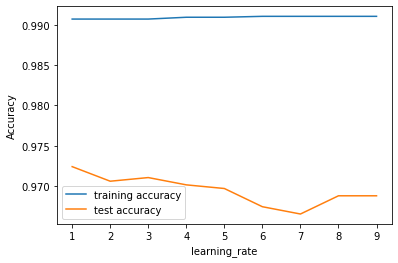

In [65]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [66]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [67]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [68]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [69]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.987
Multi-layer Perceptron : Accuracy on test Data: 0.969

Multi-layer Perceptron : f1_score on training Data: 0.988
Multi-layer Perceptron : f1_score on test Data: 0.988

Multi-layer Perceptron : Recall on training Data: 0.994
Multi-layer Perceptron : Recall on test Data: 0.983

Multi-layer Perceptron : precision on training Data: 0.983
Multi-layer Perceptron : precision on test Data: 0.962


In [70]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [71]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [72]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.961,0.965,0.991,0.993
5,Random Forest,0.968,0.972,0.993,0.990
6,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
7,CatBoost Classifier,0.972,0.975,0.994,0.989
8,Multi-layer Perceptron,0.969,0.972,0.994,0.983


In [73]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [74]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Multi-layer Perceptron,0.969,0.972,0.994,0.983
3,Random Forest,0.968,0.972,0.993,0.990
4,Support Vector Machine,0.964,0.968,0.980,0.965
5,Decision Tree,0.961,0.965,0.991,0.993
6,K-Nearest Neighbors,0.956,0.961,0.991,0.989
7,Logistic Regression,0.934,0.941,0.943,0.927
8,Naive Bayes Classifier,0.605,0.454,0.292,0.997


## Storing Best Model

In [75]:
# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

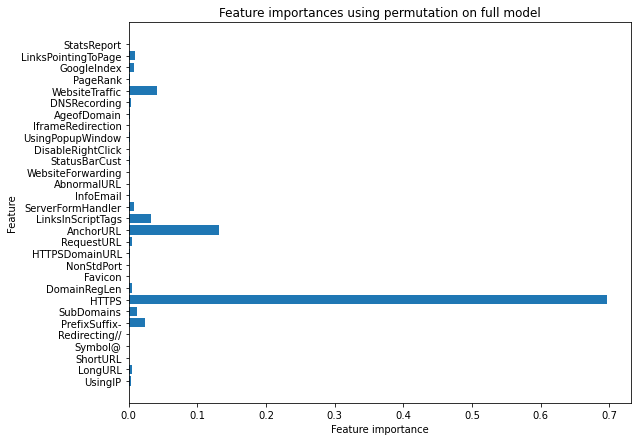

In [76]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.


<h1>BUILDING GUI</h1>

In [77]:
#pip install whois

In [78]:
import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
from googlesearch import search
import whois
from datetime import date, datetime
import time
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse

class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass


        

        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())
        

        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())

        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())


     # 1.UsingIp check for ipaddress
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.shortUrl checking dynmainc links
    def shortUrl(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.Symbol@
    def symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1
    
    # 5.Redirecting//
    def redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1
    
    # 6.prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1
    
    # 7.SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except:
            return 1

    # 9.DomainRegLen age of url
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except:
            return -1
    
    # 13. RequestURL
    def RequestURL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1
    
    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i,success = 0,0
        
            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecording    
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. WebsiteTraffic   
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. PageRank popularity of page
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1
            

    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. LinksPointingToPage related to page ranks
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1
    
    def getFeaturesList(self):
        return self.features


In [79]:
import webbrowser
from colorama import Fore, Back, Style
  

def gui(URL):
    instance=FeatureExtraction(URL)
    #print(instance.getFeaturesList())
    x=instance.getFeaturesList()
    features = np.array(x)
    new = features.reshape(1,30)
    prediction=gbc.predict(new)
    y_pro_phishing = gbc.predict_proba(new)[0,0]
    y_pro_non_phishing = gbc.predict_proba(new)[0,1]
    if prediction==1:
        #webbrowser.open(URL)
        #print(y_pro_non_phishing)
        return ("Safe Website - " +str(int(round(y_pro_non_phishing*100,2)))+"% safe" )
    else:
        #print(y_pro_phishing)
        return ("Unsafe Website - " +str(int(round(y_pro_phishing*100,2)))+"% unsafe" )
    

it1=gr.Interface(fn=gui,inputs=gr.Textbox(placeholder="Enter URL here...",label="URL"),outputs=gr.Textbox(placeholder="Waiting for Result...",label="RESULT"),allow_flagging="never",title="STRIKE",description="<h3><center>A URL phishing tool made using machine learning algorithms and gradio library.</center></h3>",article="MADE BY:-<br>MITHUL CHANDER - PES2UG20CS198<br>NIRAV ANTONY - PES2UG20CS227<br>NISHANTH PATRI - PES2UG20CS229<br>NITHANTH SAWKAR - PES2UG20CS230",examples=["https://www.kaggle.com/datasets/eswarchandt/phishing-website-detector","g00gle.com"])
it1.launch(share=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x249a8c4c430>, 'http://127.0.0.1:7860/', None)

In [80]:
# import webbrowser
# import gradio as gr
# def update(name):
#     return f"Welcome to Gradio, {name}!"

# def go_to(url):
#     webbrowser.open(url)
    

# with gr.Blocks() as demo:
#     gr.Markdown("<center><h1>STRIKE<h1></center>")
#     gr.Markdown("<h3><center>A URL phishing tool made using machine learning algorithms and gradio library.</center></h3>")
#     with gr.Row():
#         inp = gr.Textbox(placeholder="Enter URL ...")
#         out = gr.Textbox()
#     btn1 = gr.Button("Run")
#     btn2 = gr.Button("Go to")
#     btn1.click(fn=update, inputs=inp, outputs=out)
#     btn2.click(fn=go_to("abc"), inputs=inp, outputs=out)

# demo.launch()